In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gmt = ceo.GMT_MX()
src = ceo.Source('V',rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
pxscl = 1 # pixel scale [arcsec]
NN = 60*4 # FOV
n = NN
u = (np.arange(n)-0.5*(n-1))*pxscl
n = NN-1
v = (np.arange(n)-0.5*(n-1))*pxscl
x,y = np.meshgrid(u,v)
x = x.T
y = y.T
x = x.ravel()
y = y.ravel()
z = np.hypot(x,y)*ceo.constants.ARCSEC2RAD
o = np.arctan2(y,x)
srcs_x = ceo.Source('V',zenith=z,azimuth=o,
             rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
srcs_x>>(gmt,)
x,y = np.meshgrid(v,u)
x = x.T
y = y.T
x = x.ravel()
y = y.ravel()
z = np.hypot(x,y)*ceo.constants.ARCSEC2RAD
o = np.arctan2(y,x)
srcs_y = ceo.Source('V',zenith=z,azimuth=o,
             rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
srcs_y>>(gmt,)

OPTICAL PATH: ['GMT_MX']
OPTICAL PATH: ['GMT_MX']


In [3]:
+srcs_x
+srcs_y
chief_ray_x =  srcs_x.rays.sphere_origins.host()*1e3
chief_ray_y =  srcs_y.rays.sphere_origins.host()*1e3

In [4]:
print srcs_x.rays.sphere_radius.shape
print srcs_x.rays.sphere_distance.shape

(57360, 1)
(57360, 1)


In [5]:
data = chief_ray_x[:,0].reshape(-1,n)
#print data
scale_x = data[:-1,:]-data[1:,:]
#print scale_x
#print scale_x[n-1,n-1]

data = chief_ray_y[:,1].reshape(n,-1)
#print data
scale_y = data[:,:-1]-data[:,1:]
#print scale_y

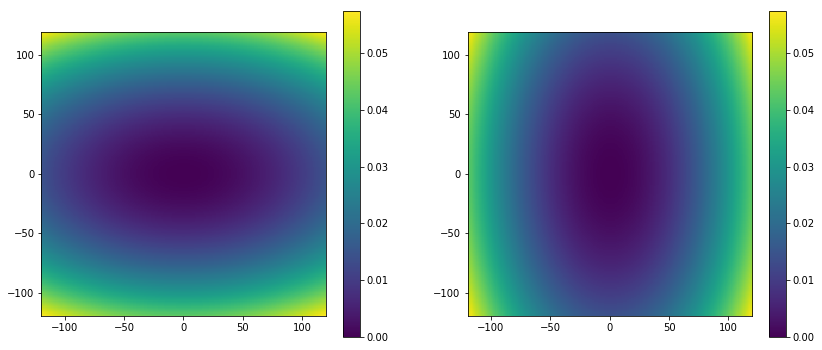

In [6]:
hn = (n-1)/2
rel_scale_x = 1e2*np.abs(1 - scale_x/scale_x[hn,hn])
rel_scale_y = 1e2*np.abs(1 - scale_y/scale_y[hn,hn])
#print rel_scale_x

fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(rel_scale_x,extent=[u[0],u[-1],u[0],u[-1]])
plt.colorbar(h1,ax=ax1)

h2 = ax2.imshow(rel_scale_y,extent=[u[0],u[-1],u[0],u[-1]])
plt.colorbar(h2,ax=ax2)

In [7]:
gmt.M2.transform([0,0,1e-2],[0,0,0])
gmt.M2.motion_CS.update()
+srcs_x
+srcs_y
chief_ray_x =  srcs_x.rays.sphere_origins.host()*1e3
chief_ray_y =  srcs_y.rays.sphere_origins.host()*1e3
data = chief_ray_x[:,0].reshape(-1,n)
scale_x_t = data[:-1,:]-data[1:,:]
data = chief_ray_y[:,1].reshape(n,-1)
scale_y_t = data[:,:-1]-data[:,1:]

In [8]:
scale_x_v = np.abs(scale_x_t - scale_x)/scale_x
scale_y_v = np.abs(scale_y_t - scale_y)/scale_y

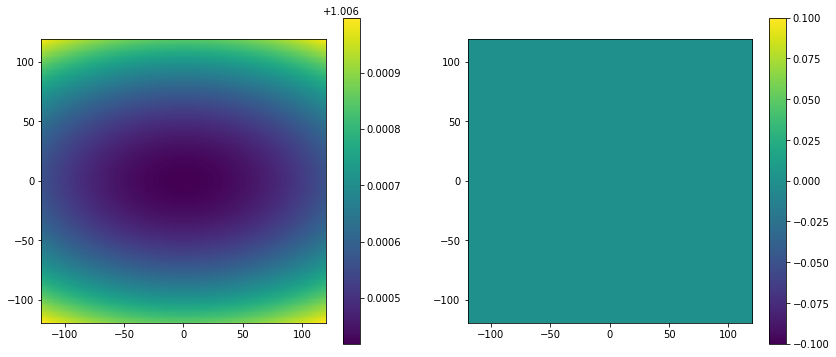

In [9]:
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(14,6)
h1 = ax1.imshow(scale_x_t,extent=[u[0],u[-1],u[0],u[-1]])
plt.colorbar(h1,ax=ax1)

h2 = ax2.imshow(scale_y_v,extent=[u[0],u[-1],u[0],u[-1]])
plt.colorbar(h2,ax=ax2)

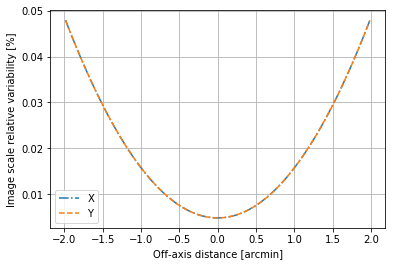

In [10]:
plt.plot(v/60,np.mean(rel_scale_x,axis=1),'-.',label='X')
plt.plot(v/60,np.mean(rel_scale_y,axis=0),'--',label='Y')
plt.grid()
plt.xlabel('Off-axis distance [arcmin]')
plt.ylabel('Image scale relative variability [%]')
plt.legend()

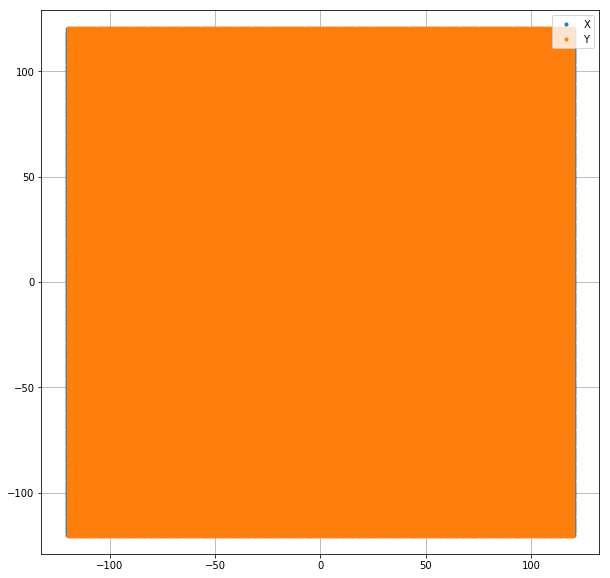

In [11]:
plt.figure(figsize=(10,10))
plt.plot(chief_ray_x[:,0],chief_ray_x[:,1],'.',label='X')
plt.plot(chief_ray_y[:,0],chief_ray_y[:,1],'.',label='Y')
#plt.plot(chief_ray0[:,0],chief_ray0[:,1],'.')
plt.axis('equal')
plt.grid()
plt.legend()

In [12]:
src = ceo.Source('V',zenith=0.5*ceo.constants.ARCSEC2RAD,
                 rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
src>>(gmt,)
+src
pxscl = -src.rays.sphere_origins.host()[0,0]*1e3

OPTICAL PATH: ['GMT_MX']


In [13]:
src = ceo.Source('V',zenith=0.5*ceo.constants.ARCSEC2RAD,azimuth=np.pi,
                 rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
src>>(gmt,)
+src
pxscl += src.rays.sphere_origins.host()[0,0]*1e3
print "Image scale: 1arcsec=%.6fmm"%pxscl

OPTICAL PATH: ['GMT_MX']
Image scale: 1arcsec=1.006419mm


In [14]:
off_axis_dist = 2*60

In [15]:
src = ceo.Source('V',zenith=(off_axis_dist+0.5)*ceo.constants.ARCSEC2RAD,
                 rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
src>>(gmt,)
+src
field_pxscl = -src.rays.sphere_origins.host()[0,0]*1e3

OPTICAL PATH: ['GMT_MX']


In [16]:
src = ceo.Source('V',zenith=(off_axis_dist-0.5)*ceo.constants.ARCSEC2RAD,
                 rays_box_sampling=1,rays_box_size=25.5,rays_origin=[0,0,25])
src>>(gmt,)
+src
field_pxscl += src.rays.sphere_origins.host()[0,0]*1e3

OPTICAL PATH: ['GMT_MX']


In [17]:
np.abs(1-field_pxscl/pxscl)*1e2

0.043812717709657001

In [18]:
src.rays.sphere_origins.host()

array([[ -1.20284427e-01,  -5.22274861e-15,  -5.83329488e+00]])

In [34]:
%%capture
off_axis_dist = np.arange(-5*60,5*60+1)
imscl_x = np.zeros(off_axis_dist.shape)
imscl_y = np.zeros(off_axis_dist.shape)
kk=0
delta_v = 0.5*np.exp(1j*(np.arange(4)*np.pi/2))
for _off_axis_dist_ in off_axis_dist:
    d = []
    for k in range(4):
        alpha = _off_axis_dist_ + delta_v[k]
        src = ceo.Source('V',zenith=np.abs(alpha)*ceo.constants.ARCSEC2RAD,
                         azimuth=np.angle(alpha),
                         rays_box_sampling=1,
                         rays_box_size=25.5,rays_origin=[0,0,25])
        src>>(gmt,)
        +src
        d += [src.rays.sphere_origins.host()]
    imscl_x[kk] = np.abs(1-1e3*np.abs(d[2][0,0]-d[0][0,0])/pxscl)*1e2
    imscl_y[kk] = np.abs(1-1e3*np.abs(d[3][0,1]-d[1][0,1])/pxscl)*1e2
    kk+=1

1.0180189392e-08


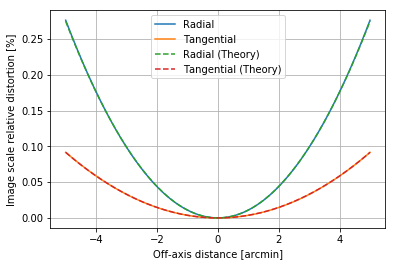

In [41]:
a = np.polyfit(off_axis_dist,imscl_y/100,2)[0]
print a
plt.plot(off_axis_dist/60.0,imscl_x,label='Radial')
plt.plot(off_axis_dist/60.0,imscl_y,label='Tangential')
plt.plot(off_axis_dist/60.0,100*3*a*off_axis_dist**2,'--',label='Radial (Theory)')
plt.plot(off_axis_dist/60.0,100*a*off_axis_dist**2,'--',label='Tangential (Theory)')
plt.grid()
plt.xlabel('Off-axis distance [arcmin]')
plt.ylabel('Image scale relative distortion [%]')
plt.legend()